In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Identify small clusters according to ```npEM```

In [2]:
posteriors = pd.read_csv('./results/posteriors_1_5_CPMcutoff_suffix_1_log_it_1000_npEM.csv',index_col=0)
posteriors['cluster'] = np.argmax(posteriors.values, axis = 1)
posteriors['max_prob'] = np.max(posteriors.values[:,:9], axis = 1)
points = pd.read_csv('./data/1_5_CPMcutoff_suffix_1_log.csv',index_col=0)
posteriors['norm'] = np.linalg.norm(points.values, axis = 1, ord = 1)
posteriors['min_point'] = np.min(points.values,axis = 1)
posteriors['max_point'] = np.max(points.values,axis = 1)
posteriors.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,cluster,max_prob,norm,min_point,max_point
1,0.447062,0.540111,0.005014,0.002056,1.363099e-07,0.003535,7.844987e-07,2.996924e-07,0.002222,1,0.540111,14.377147,2.020308,5.802458
2,0.002414,0.188788,0.004876,0.002008,1.481195e-02,0.000002,8.494468e-39,2.816979e-21,0.787100,8,0.787100,19.451988,2.755359,7.149923
3,0.233031,0.207573,0.546736,0.000002,6.073813e-07,0.006238,6.758249e-09,2.055622e-05,0.006399,2,0.546736,12.322592,1.596058,4.178899
4,0.822136,0.105129,0.027141,0.000098,1.143771e-09,0.045328,1.004719e-05,8.863798e-05,0.000070,0,0.822136,11.297093,1.751904,3.421740
5,0.001232,0.319599,0.001132,0.000015,1.994432e-03,0.000004,1.222597e-17,4.420272e-17,0.676022,8,0.676022,19.278449,3.481197,5.683603


In [3]:
small_clust = posteriors.cluster.value_counts(normalize = True).index[-4:].values
posteriors.cluster.value_counts(normalize = True)

1    0.252354
7    0.191605
0    0.182988
8    0.137071
5    0.136825
2    0.041608
6    0.034653
4    0.022035
3    0.000862
Name: cluster, dtype: float64

# Compare the ```max_prob``` in both cases

In [4]:
small_clust

array([2, 6, 4, 3])

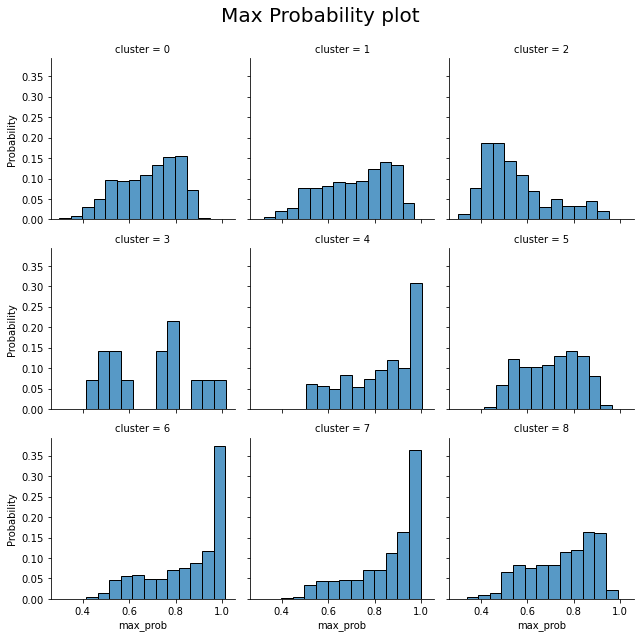

In [5]:
g = sns.FacetGrid(posteriors, col='cluster',col_wrap=3)
g.map(sns.histplot, 'max_prob', stat = 'probability',binwidth=0.05)
g.fig.subplots_adjust(top=0.9);
g.fig.suptitle('Max Probability plot',fontsize = 20);

## Half of the small clusters tend to not have a strong probability. 
This is the case for clusters ```2``` and ```3``` but clusters ```4``` and ```6``` have strong probabilities of corresponding to said clusters, despite not being big (around 3%).


# Study the norm in clusters

We first look at the minimum point in each cluster, and then at the norm in each cluster

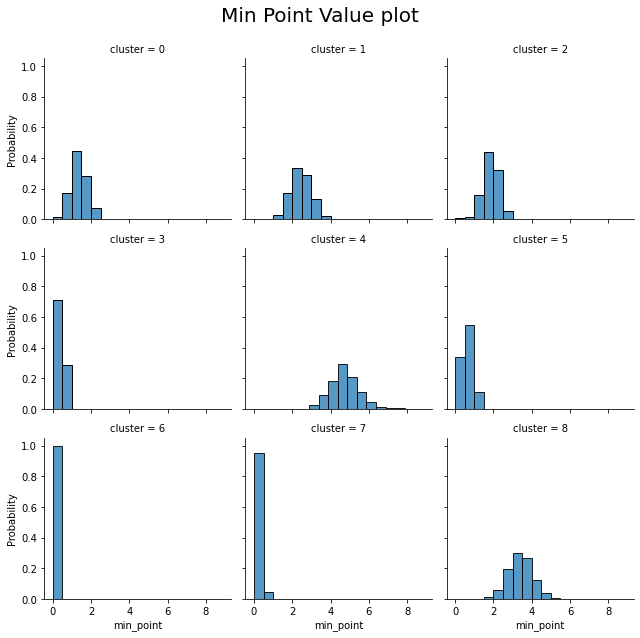

In [6]:
g = sns.FacetGrid(posteriors, col="cluster",col_wrap=3)
g.map(sns.histplot, 'min_point', stat = 'probability',binwidth=0.5)
g.fig.subplots_adjust(top=0.9);
g.fig.suptitle('Min Point Value plot',fontsize = 20);

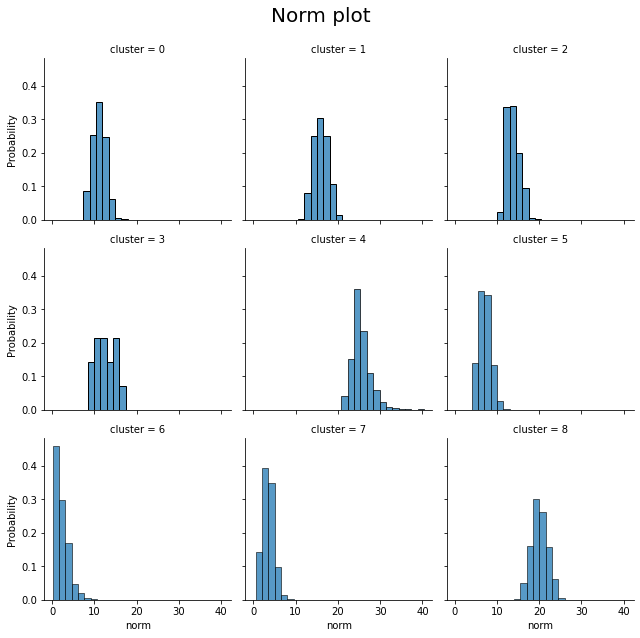

In [18]:
g = sns.FacetGrid(posteriors, col='cluster',col_wrap=3)
g.map(sns.histplot, 'norm', stat = 'probability',binwidth=1.5)
g.fig.subplots_adjust(top=0.9);
g.fig.suptitle('Norm plot',fontsize = 20);

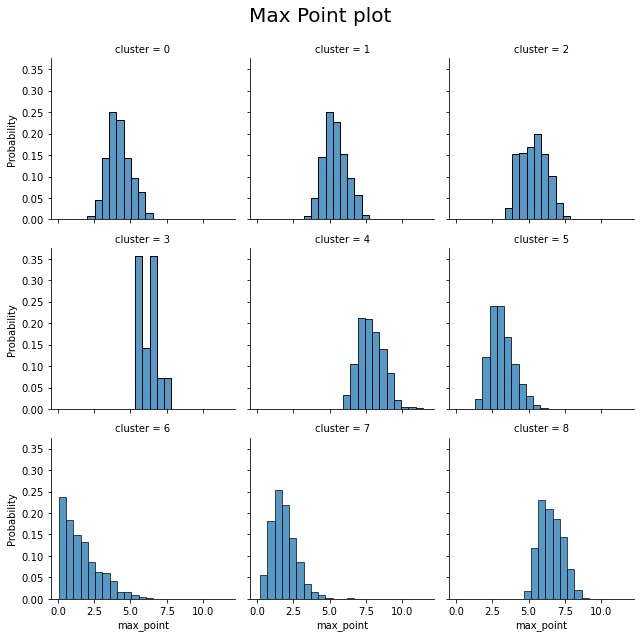

In [8]:
g = sns.FacetGrid(posteriors, col='cluster',col_wrap=3)
g.map(sns.histplot, 'max_point', stat = 'probability',binwidth=0.5)
g.fig.subplots_adjust(top=0.9);
g.fig.suptitle('Max Point plot',fontsize = 20);

# Discoveries

Clusters ```6``` and ```3``` tend to have a close to cero element. But also does ```7``` which is the second largest cluster. 

On terms of norm ```6``` and ```7``` tends to have a very small norm. The ```4``` clusters tends to have a specially large norm. Cluster ```3``` is the only one who shows a not "normal" norm. 

In respect to max point, cluster ```6``` tends to have small max points, meaning that in general he has all its values close to $0$. This also happens to cluster ```7``` but not as extreme. Cluster ```4``` has uniformly big values. This also happens to cluster ```8``` but again not as extreme. 

In general the small clusters are either not so probable or extreme values. 

Cluster ```3``` is too small to give any significant information.

In general, ```6``` should belong to cluster ```7``` and cluster ```4``` should belong to cluster ```8```. Cluster ```3``` is too small to exist and cluster ```2``` is a mix between clusters. 

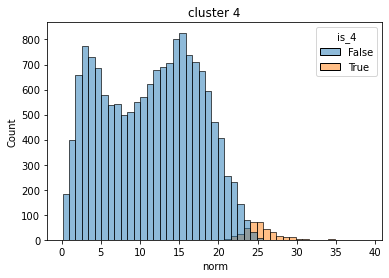

In [9]:
posteriors['is_4'] = posteriors.cluster == 4
sns.histplot(data = posteriors, x = 'norm', hue = 'is_4').set_title('cluster 4');

In [16]:
norm_4 = posteriors.norm[posteriors.is_4]
norm_4.describe(percentiles=[0.02,0.05,0.1])

count    358.000000
mean      25.507319
std        2.326368
min       20.838820
2%        21.742823
5%        22.425170
10%       23.143867
50%       25.120772
max       38.935099
Name: norm, dtype: float64

In [11]:
posteriors.norm.describe(percentiles=[0.8,0.9,0.95,0.99])

count    16247.000000
mean        11.651758
std          6.327508
min          0.119334
50%         12.042595
80%         17.468963
90%         19.721232
95%         21.691489
99%         25.321543
max         38.935099
Name: norm, dtype: float64

# About the norm
$95\%$ of the values have a norm smaller than $21.6$ and $98\%$ of cluster ```4``` is bigger than $21.7$

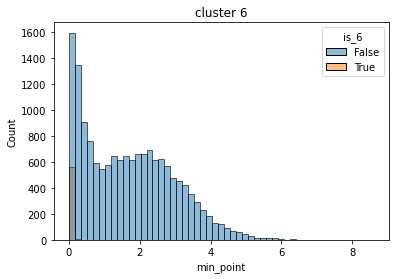

In [12]:
posteriors['is_6'] = posteriors.cluster == 6
sns.histplot(data = posteriors, x = 'min_point', hue = 'is_6').set_title('cluster 6');

In [13]:
norm_6 = posteriors.min_point[posteriors.is_6]
norm_6.describe(percentiles=[0.85,0.9,0.95])

count    563.000000
mean       0.018104
std        0.037627
min        0.000000
50%        0.000000
85%        0.049948
90%        0.074385
95%        0.091466
max        0.288091
Name: min_point, dtype: float64

In [14]:
posteriors.min_point.describe(percentiles=[0.01,0.05,0.1])

count    16247.000000
mean         1.641606
std          1.282694
min          0.000000
1%           0.000000
5%           0.026203
10%          0.114924
50%          1.516342
max          8.595142
Name: min_point, dtype: float64

$90\%$ of the points have a bigger minimum (among coordinates) than $0.11$ but $90\%$ of the points belonging to cluster ```6``` have a smaller minimum (among coordinates) than $0.07$

# Bigger clusters using norm

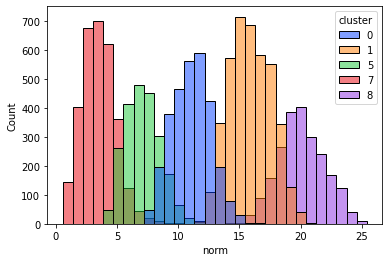

In [15]:
clean_post = posteriors[~posteriors.cluster.isin([2,3,4,6])].copy()
sns.histplot(data = clean_post, x = 'norm', hue = 'cluster',palette = 'bright');